# Wyznaczanie ortocentrum trójkąta

W tym pliku przestudiujemy problem wyznaczenia algebraicznie ortocentrum trójkąta. Wykorzystamy to następnie w zadaniu.

In [2]:
x,y,a,b=var('x,y,a,b')

In [3]:
punkt1=vector((0,0))
punkt2=vector((x,y))
punkt3=vector((a,b))

In [4]:
m1,m2,m3=var('m1,m2,m3')
#wysokosc na odcinek 1-2
wysokosc1=vector((-y,x))
#wysokosc na odcinek 1-3
wysokosc2=vector((-b,a))
#wysokosc na odcinek 2-3
wysokosc3=vector((-(b-y),a-x))

#boki
bok1=vector((a,b))
bok2=vector((x,y))
bok3=vector((a-x,b-y))

In [5]:
bok1-bok2-bok3

(0, 0)

In [6]:
c1=punkt1+m1*wysokosc3
c3=punkt3+m3*wysokosc1
c2=punkt2+m2*wysokosc2

print c1-c2
print c1-c3
print c2-c3

(-(b - y)*m1 + b*m2 - x, (a - x)*m1 - a*m2 - y)
(-(b - y)*m1 + m3*y - a, (a - x)*m1 - m3*x - b)
(-b*m2 + m3*y - a + x, a*m2 - m3*x - b + y)


In [7]:
v1=c1-c2;
v2=c1-c3;
v3=c2-c3;


In [8]:
#znalezienie ortocentrum
solve([v1[0]==0,v1[1]==0,v2[0]==0,v2[1]==0,v3[0]==0,v3[1]==0],(m1,m2,m3))

[[m1 == -(a*x + b*y)/(b*x - a*y), m2 == -(a*x - x^2 + b*y - y^2)/(b*x - a*y), m3 == -(a^2 + b^2 - a*x - b*y)/(b*x - a*y)]]

In [9]:
pretty_print(c1.subs(m1== -(a*x + b*y)/(b*x - a*y)).simplify())

((a*x + b*y)*(b - y)/(b*x - a*y), -(a*x + b*y)*(a - x)/(b*x - a*y))

Zadanie: Znaleźć równanie punktu ortocentrum, gdy wierzchołki trójkąta zadane są następująco:
$(0,0)$, $(\cos(t),\sin(t))$ oraz $(0,1)$

In [2]:
t=var('t')

In [11]:
c1.subs(m1== -(a*x + b*y)/(b*x - a*y)).subs(a=cos(t),b=sin(t),x=0,y=1)

(-(sin(t) - 1)*sin(t)/cos(t), sin(t))

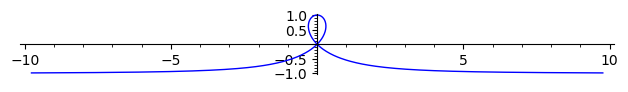

In [3]:
graph2=parametric_plot((-(sin(t) - 1)*sin(t)/cos(t), sin(t)),(t,-(1/2*pi-0.2),3/2*pi-0.2));
graph2

In [4]:
#dynamiczne wyświetlanie
@interact
def Trojkat1(b = slider([a/10-0.1 for a in [0..13]],default = 0.2, label="krotność")):
    t=pi*b
    p1=(0,0)
    p2=(0,1)
    p3=(cos(t),sin(t))
    p4=(-(sin(t) - 1)*sin(t)/cos(t), sin(t))
    gra=Graphics()
    gra=gra+point(p1)+point(p2)+point(p3)+point(p4,size=30,rgbcolor=(1,0,0))
    gra=gra+line([p1,p3,p2,p1])
    show(graph2+gra,figsize=[3,3],xmin=-2,xmax=2,ymin=-2,ymax=2)


Interactive function <function Trojkat1 at 0x7f3248988c20> with 1 widget
  b: SelectionSlider(description='kro…

In [14]:
#Jak znaleźć równanie uwikłane zadanej krzywej?
x1=-(sin(t) - 1)*sin(t)/cos(t)
y1=sin(t)

In [15]:
((1/(x1/(y1-1)/y1))^2+y1^2-1).simplify_full()

0

In [16]:
x,y=var('x,y')

In [17]:
((1/(x/(y-1)/y))^2+y^2-1).factor()

(x^2*y + y^3 + x^2 - y^2)*(y - 1)/x^2

In [18]:
#Równanie (x^2*y + y^3 + x^2 - y^2)=0 zadaje postać uwikłaną

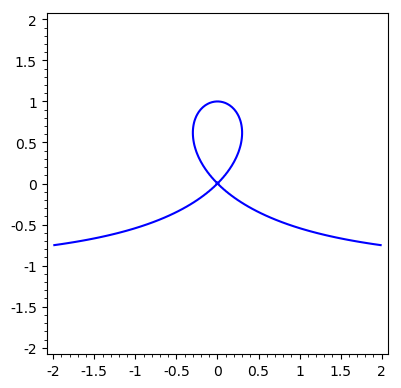

In [19]:
implicit_plot((x^2*y + y^3 + x^2 - y^2)==0,(x,-2,2),(y,-2,2))

Ta krzywa jest elementem rodziny konchoid opisanej przez René de Sluze w 1662. 

$(X - 1) (X^2 + Y^2) = aX^2$ (nasza krzywa odpowiada dla a=2)


Sprawdź [http://mathworld.wolfram.com/ConchoidofdeSluze.html](http://mathworld.wolfram.com/ConchoidofdeSluze.html)

Zadanie: wyznacz parametryzację wymierną tej krzywej